# ECE 657A: Data and Knowledge Modeling and Analysis





Assignment 1: Basic Environment Set-up and Classification

Submitted By: Abinaya Ravichandran - 20868680

# Question 1: 
Exploratory Data Analysis on Iris Data Set

In [10]:
#Importing libraries:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns

Iris Dataset has five features which are 'Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width' and the Species Type. Species type are stored as 0, 1, 2 whose corresponding targets values are 'setosa', 'versicolor', 'virginica' respectively.

In [17]:
#importing data:
dataset = load_iris()
print("Feature name : ", dataset.feature_names, "\n")
print("Target names : ", dataset.target_names, "\n")

Feature name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Target names :  ['setosa' 'versicolor' 'virginica'] 



DataFrame function from the Pandas library is being used here to convert the array of data in Iris Dataset to Pandas Dataframe with the columns 'Petal length','Petal Width','Sepal Length','Sepal Width' and create a new column 'Species' with target values from the dataset. Lambda function is being used to covert the target values from 0,1,2 to 'setosa', 'versicolor', 'virginica' respectively for better understanding

In [3]:
iris = pd.DataFrame(dataset['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
iris["Species"] = dataset['target']
iris["Species"] = iris['Species'].apply(lambda x: dataset['target_names'][x])

Displaying the Iris DataFrame created:

In [4]:
iris.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Exploring the information of the Iris DataFrame:

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Visualizing the distribution using Scatter plot using the Pairplot function from Seaborn Library:

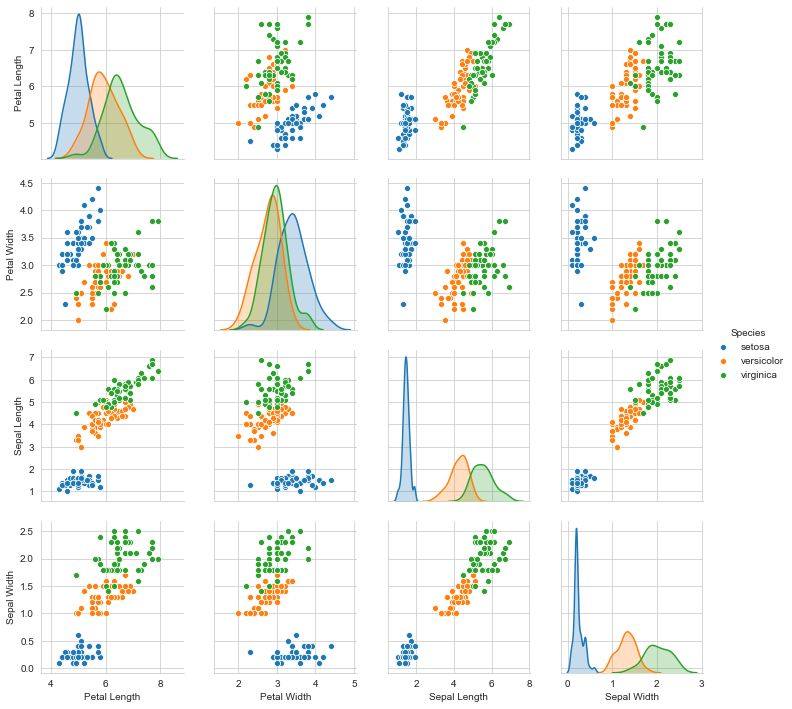

In [6]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue = 'Species')

Scatter plots are used to determine the seperability of the features of the dataset. 
The scatter plot of Iris dataset shows that:
    - Most of the features here could be used to predict the type of the species. 
    - using the sepal length and width alone would make distinguishing Iris versicolor and virginica hard
    - using petal length we can separate iris-setosa



Heat Map:




In [7]:
#importing Libraries:
import matplotlib.pyplot as plt
%matplotlib inline

[]

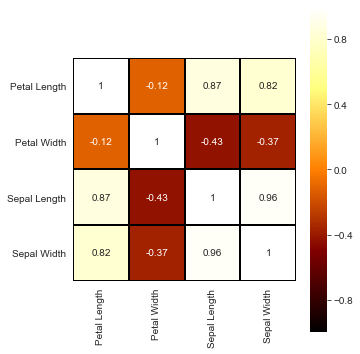

In [8]:
figure = plt.gcf()
figure.set_size_inches(5,6)
figure = sns.heatmap(iris.corr(),annot=True,cmap='afmhot',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
bottom, top = figure.get_ylim()
figure.set_ylim(bottom + 0.5, top - 0.5)
plt.plot()

Heat map is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation. Here, we can see that Sepal Length and Sepal Width features are slightly correlated with each other.

Violin Plots:

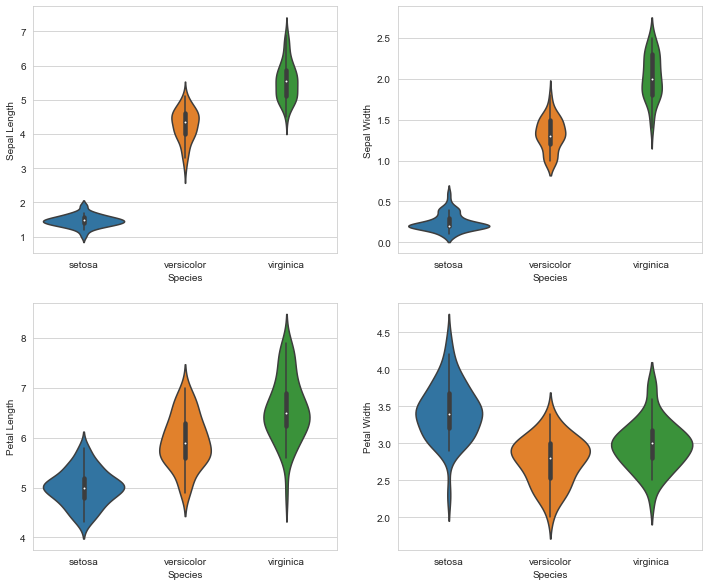

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x = "Species",y="Sepal Length",data=iris)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="Sepal Width",data=iris)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="Petal Length",data=iris)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="Petal Width",data=iris)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

# Question 2: KNN

In [10]:
#Importing libraries:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Split the data and Train the Model: Training and testing on the same data is not an optimal approach, so we do split the data into two pieces, training set and testing set. We use ‘train_test_split’ function to split the data. Optional parameter ‘test-size’ determines the split percentage. ‘random_state’ parameter makes the data split the same way every time you run. Since we are training and testing on different sets of data, the resulting testing accuracy will be a better estimate of how well the model is likely to perform on unseen data.

Splitting the data into training, validation and test sets (60,20,20)

In [11]:
X = dataset.data
y = dataset.target
#Splitting the data into Train(80%) and Test(20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the 80% Training data into Train(75%) and Validation(25%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training Data count: ", X_train.shape)
print("Testing Data count: ", X_test.shape)
print("Validation Data count: ", X_val.shape)

Training Data count:  (90, 4)
Testing Data count:  (30, 4)
Validation Data count:  (30, 4)


In [12]:
#Training the Test data with different K value
k_value_range = (1,5,10,15,20,25,30,35)
scores_val = {}
scores_list_val = []
for k in k_value_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores_val[k] = metrics.accuracy_score(y_val,y_pred)
    scores_list_val.append(metrics.accuracy_score(y_val,y_pred))

for key, value in scores_val.items():
    print("For value of k:",key, "the accuracy score is", value)

For value of k: 1 the accuracy score is 0.9
For value of k: 5 the accuracy score is 0.9333333333333333
For value of k: 10 the accuracy score is 0.9333333333333333
For value of k: 15 the accuracy score is 0.9333333333333333
For value of k: 20 the accuracy score is 0.9333333333333333
For value of k: 25 the accuracy score is 0.9666666666666667
For value of k: 30 the accuracy score is 0.9666666666666667
For value of k: 35 the accuracy score is 0.9333333333333333


Text(0, 0.5, 'Testing Accurary')

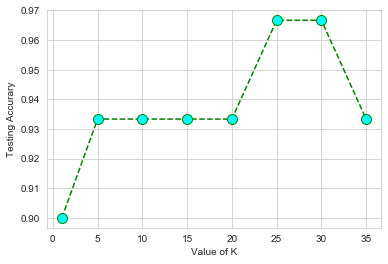

In [13]:
#Plotting the graph showing relationship between the accuracy and parameters
plt.plot(k_value_range,scores_list_val, color='green', linestyle='dashed', marker='o',markerfacecolor='cyan', markersize=10)
plt.xlabel("Value of K")
plt.ylabel("Testing Accurary")

Both the k values 25 & 30 has provided the same best accuracy of the model. Lesser the value of k, more the desirable accuracy would be, as the model would look for closer data points. Hence k =25 is considered the best accuracy of the model.

In [14]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy score of KNN is ", score)

Accuracy score of KNN is  1.0


# Question 3: SVM

In [15]:
#Importing libraries:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from statistics import mean

#splitting the data into Train(80%) and Test(20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data count: ", X_train.shape)
print("Testing Data count: ", X_test.shape)

Training Data count:  (120, 4)
Testing Data count:  (30, 4)


In [16]:
#Training the Test data with different C values
c_value_range = (0.1, 0.5, 1, 2, 5, 10, 20, 50)

mean_scores = {}
score_list = []

for c in c_value_range:
    #defining a linear kernel and random state 42
    svm_clf = svm.SVC(kernel = 'linear', C = c, random_state = 42)
    #Applying 10-fold cross validation
    score = cross_val_score(svm_clf, X_train, y_train, cv = 10)
    mean_scores[c] = score.mean()
    score_list.append(score.mean())
    
for key, value in mean_scores.items():
    print("For the value C:", key, "accuracy score is", value)

For the value C: 0.1 accuracy score is 0.9575757575757576
For the value C: 0.5 accuracy score is 0.9666666666666666
For the value C: 1 accuracy score is 0.9666666666666666
For the value C: 2 accuracy score is 0.9666666666666668
For the value C: 5 accuracy score is 0.9666666666666668
For the value C: 10 accuracy score is 0.9666666666666668
For the value C: 20 accuracy score is 0.9423076923076923
For the value C: 50 accuracy score is 0.933974358974359


Value of C determines the penalty of the misclassifying data points, thus having lesser C value will give more optimal classification model. Thus choosing value of C = 0.5

Text(0, 0.5, 'Mean Accurary')

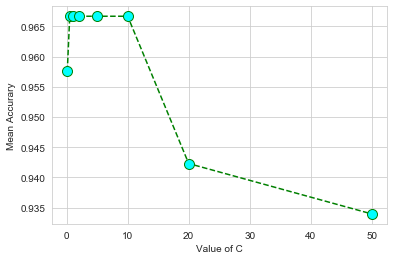

In [17]:
plt.plot(c_value_range, score_list,  color='green', linestyle='dashed', marker='o',markerfacecolor='cyan', markersize=10)
plt.xlabel("Value of C")
plt.ylabel("Mean Accurary")

In [18]:
svmclassifier = svm.SVC(kernel = 'linear', C = 0.5)
svmclassifier.fit(X_train, y_train)
y_pred = svmclassifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score of SVM:", score)

Accuracy score of SVM: 1.0


# Question 4: Tree-based Classifiers

# Decision Tree:

In [19]:
#Importing libraries:
from sklearn import tree

#Training the test data with different maximum depth of the tree
max_depth_range = (3,5,10, None)
tree_score_list = []
tree_score = {}
for d in max_depth_range:
    #defining a decision tree classification with random state 42
    dtree_clf = tree.DecisionTreeClassifier(random_state=42, max_depth=d)
    #Applying 10-fold cross validation
    score = cross_val_score(dtree_clf, X_train, y_train, cv = 10)
    tree_score[d] = score.mean()
    tree_score_list.append(score.mean())

for key,value in tree_score.items():
    print("For maximum depth:", key, "the mean accuracy is", value)

For maximum depth: 3 the mean accuracy is 0.9332167832167831
For maximum depth: 5 the mean accuracy is 0.908216783216783
For maximum depth: 10 the mean accuracy is 0.9248834498834497
For maximum depth: None the mean accuracy is 0.9248834498834497


Text(0, 0.5, 'Testing Accurary')

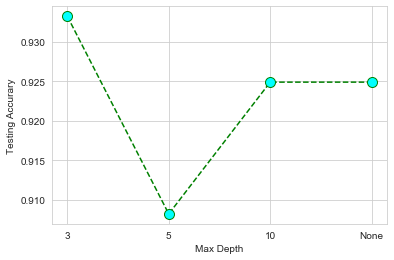

In [20]:
max_depth_range_temp = (3,5,10,"None")
plt.plot(max_depth_range_temp,tree_score_list, color='green', linestyle='dashed', marker='o',markerfacecolor='cyan', markersize=10)
plt.xlabel("Max Depth")
plt.ylabel("Testing Accurary")

Best Accuracy: 3 with the highest mean accuracy 0.9332167832167831

In [21]:
best_dtree_clf = tree.DecisionTreeClassifier(random_state = 42, max_depth = 3)
best_dtree_clf.fit(X_train, y_train)
y_pred = best_dtree_clf.predict(X_test)
print("Accuracy of Decision Tree: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree:  1.0


# Random Forest:

In [22]:
#Importing libraries
from sklearn.ensemble import RandomForestClassifier

#Training the test data with various number of trees
no_of_trees_range = [5, 10, 50, 150, 200]

#Training the test data with different maximum depth of the tree
max_depth_range = [3, 5, 10, None]


tree_score_list = np.zeros(shape=(5,4))

for d in range(len(max_depth_range)):
    for t in range(len(no_of_trees_range)):
        #defining a decision tree classification with random state 42
        rforest_clf = RandomForestClassifier(random_state=42, n_estimators = no_of_trees_range[t], max_depth=max_depth_range[d] )
        #Applying 10-fold cross validation
        score = cross_val_score(rforest_clf, X_train, y_train, cv = 10)
        tree_score_list[t][d] = sum(score)/len(score)

print(tree_score_list)



[[0.92488345 0.92488345 0.92488345 0.92488345]
 [0.93321678 0.92488345 0.92488345 0.92488345]
 [0.94155012 0.94155012 0.93321678 0.93321678]
 [0.94155012 0.93321678 0.92488345 0.92488345]
 [0.94155012 0.93321678 0.93321678 0.93321678]]


HeatMap:

            3         5        10      None
5    0.924883  0.924883  0.924883  0.924883
10   0.933217  0.924883  0.924883  0.924883
50   0.941550  0.941550  0.933217  0.933217
150  0.941550  0.933217  0.924883  0.924883
200  0.941550  0.933217  0.933217  0.933217


(5.0, 0.0)

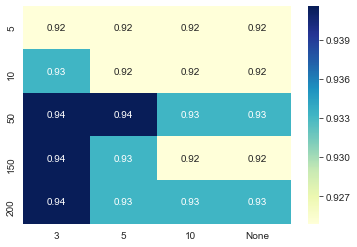

In [23]:

max_depth_range_temp = ['3', '5', '10', 'None']

df = pd.DataFrame(tree_score_list, no_of_trees_range, max_depth_range_temp)
print(df)
ax = sns.heatmap(df, cmap="YlGnBu", annot = True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


Best Accuracy:

In [24]:
rforest_clf_best = RandomForestClassifier(random_state = 42, max_depth=3, n_estimators = 50)
rforest_clf_best.fit(X_train, y_train)
y_pred = rforest_clf_best.predict(X_test)
print("Accuracy of Random Forest: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of Random Forest:  1.0


# Gradient Tree Boosting:

In [25]:
#Importing Libraries
from sklearn.ensemble import GradientBoostingClassifier

#Training the test data with different estimators
estimators_range = (5, 10, 50, 150, 200)

tree_score_list = []
tree_score = {}

for g in estimators_range:
    #defining a decision tree classification with random state 42
    gTree_clf = GradientBoostingClassifier(n_estimators = g, random_state = 42)
    gTree_clf.fit(X_train, y_train)
    #Applying 10-fold cross validation
    score = cross_val_score(gTree_clf, X_train, y_train, cv = 10)
    tree_score[g] = score.mean()
    tree_score_list.append(score.mean())

for key, value in tree_score.items():
    print("For Estimators:", key, "the mean accuracy is", value)

For Estimators: 5 the mean accuracy is 0.9325757575757574
For Estimators: 10 the mean accuracy is 0.9325757575757574
For Estimators: 50 the mean accuracy is 0.9248834498834497
For Estimators: 150 the mean accuracy is 0.9165501165501164
For Estimators: 200 the mean accuracy is 0.9165501165501164


Text(0, 0.5, 'Testing Accuracy')

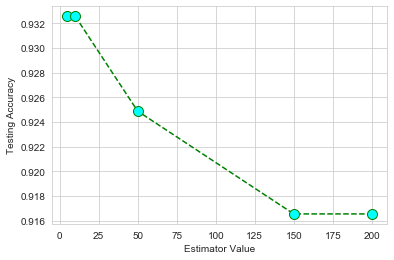

In [26]:
plt.plot(estimators_range, tree_score_list, color='green', linestyle='dashed', marker='o',markerfacecolor='cyan', markersize=10)
plt.xlabel("Estimator Value")
plt.ylabel("Testing Accuracy")

Best Accuracy:

In [27]:
gTree_cfd_best = GradientBoostingClassifier(random_state = 42, n_estimators = 5)
gTree_cfd_best.fit(X_train, y_train)
y_pred = gTree_cfd_best.predict(X_test)
print("Accuracy of Gradient Tree Boosting: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of Gradient Tree Boosting:  1.0


# Question 5: Analysis

1) Explain why you had to split the dataset into train and test sets?

Answer:    

In supervised machine learning, consuming the available dataset as training data to fit a model will result in overfitting, this means that the model would just repeat the labels of the sample data and predict the perfect accuracy score, where a model would fail to predict the yet-unseen data. In order to avoid such overfitting from occurring, we perform splitting of the dataset into Train and Test sets.


2) Explain why when finding the best parameters for KNN you didn’t evaluate directly on the test set and had to use a validation test.
    
Answer:

Validation set is used to provide an unbiased evaluation of a model fit on the training dataset to fine-tune the model hyperparameters. Upon choosing a classifier for the dataset, the training dataset is used to train the model, the validation dataset is used to compare their performances and find the best accuracy of the model with which later the test dataset is being trained on to find other performance characteristics.

3) What was the effect of changing k for KNN. Was the accuracy always affected the same way with an increase of k? Why do you think this happened?

Answer:

In K-Nearest Neighbor the value of k decides the accuracy of classification. In the Iris dataset, accuracy of the model was increased as value of k increased. This happened due to the testing functionality of the algorithm, smaller value of k tries to approximate a locally smooth function considering the nearest data points, and larger value of k predict more globally which might not be provide desirable accuracy of the model.

4) What was the relative effect of changing the max depths for decision tree and random forests? Explain the reason for this.

Answer:

The Accuracy is observed to be lesser for smaller value of max_depths for decision tree and random forest. This is because, the larger the value of max_depth, the deeper the tree becomes with unnecessary conclusions, which leads to overfitting of the model. The lesser the depth of a tree, the more reasonable the model becomes.

5) Comment on the effect of the number of estimators for Gradient Tree Boosting and what was the relative effect performance of gradient boosting compared with random forest. Explain the reason for this.

Answer:

Accuracy of the model gradually dropped as the estimator increased for the Gradient Tree Boosting, this is because the larger to value of estimator, the more the boosting stages to perform, thus considerably dropping in performance of the model. 

For the Iris dataset, Random forest's accuracy gradually increased with a greater number of trees(n_estimators) with less depth, where Gradient Tree Boosting had drop in accuracy as the number of trees increased. This is because in Random Forest, multitude of trees serves to reduce variance as its depth was also tuned parallelly, which outperformed Gradient Tree Boosting, as only the number of trees were tuned, and rest of the parameters were left default.



6) What does the parameter C define in the SVM classifier? What effect did you observe and why do you think this happened?

Answer:

The C parameter tells the SVM optimization how much to avoid misclassifying each training example, that is the Penalty of the misclassifying data point. For the Iris dataset, the larger the value of C, the lesser the accuracy, the very smaller the value of C, the accuracy was almost near to the best fitting. Larger value of C results in smaller margin of penalty, smaller value of C will have larger margin.